In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line


# SECTION A

a. Import the necessary libraries and load the dataset 'volcano_data_2010_new.csv'

In [7]:
from pyforest import *

In [171]:
vol=pd.read_csv('volcano_data_2010_new.csv')

<IPython.core.display.Javascript object>

b. Summarize the dataset and check for the number of rows and columns present in the dataset

In [6]:
vol.shape

(63, 33)

There are **63** rows and **33** columns in the data set

In [4]:
vol.head()

,Year,TSU,EQ,Name,Elevation,Type,Status,Time,VEI,Agent,...,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,Latitude,Longitude,Country
0,Jan 2010,NaN,NaN,Tungurahua,5023,Stratovolcano,Historical,D1,3.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.467,-78.442,Ecuador
1,Mar 2010,NaN,NaN,Eyjafjallajokull,1666,Stratovolcano,Historical,D1,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.630,-19.620,Iceland
2,May 2010,NaN,NaN,Pacaya,2552,Complex volcano,Historical,D1,1.0,T,...,1.0,NaN,NaN,NaN,1.0,3.0,1.0,14.381,-90.601,Guatemala
3,May 2010,TSU,EQ,Sarigan,538,Stratovolcano,Holocene,U,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.708,145.780,United States
4,Aug 2010,NaN,NaN,Karangetang [Api Siau],1784,Stratovolcano,Historical,D1,3.0,NaN,...,NaN,5.0,1.0,NaN,NaN,NaN,1.0,2.780,125.480,Indonesia


In [10]:
vol.describe()

,Elevation,VEI,DEATHS,DEATHS_DESCRIPTION,MISSING,MISSING_DESCRIPTION,INJURIES,INJURIES_DESCRIPTION,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,Latitude,Longitude
count,63.000000,19.000000,29.000000,29.000000,2.000000,2.0,18.000000,21.000000,4.00000,41.000000,...,2.000000,2.0,18.000000,21.000000,4.00000,39.000000,5.000000,14.000000,63.000000,63.000000
mean,2214.936508,2.473684,18.689655,1.103448,23.500000,1.0,134.611111,1.380952,179.55500,1.439024,...,23.500000,1.0,134.611111,1.380952,179.55500,1.461538,866.800000,1.714286,6.630159,61.109476
std,1123.700882,0.904828,67.925434,0.409253,28.991378,0.0,463.091293,0.864650,283.58661,0.807737,...,28.991378,0.0,463.091293,0.864650,283.58661,0.822261,1808.991902,0.994490,22.210795,101.622157
min,365.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.000000,3.72000,1.000000,...,3.000000,1.0,1.000000,1.000000,3.72000,1.000000,1.000000,1.000000,-41.326000,-155.292000
25%,1504.000000,2.000000,1.000000,1.000000,13.250000,1.0,3.000000,1.000000,11.80500,1.000000,...,13.250000,1.0,3.000000,1.000000,11.80500,1.000000,2.000000,1.000000,-7.542000,-19.335000
50%,2218.000000,3.000000,2.000000,1.000000,23.500000,1.0,6.500000,1.000000,57.25000,1.000000,...,23.500000,1.0,6.500000,1.000000,57.25000,1.000000,3.000000,1.000000,3.170000,110.442000
75%,2682.000000,3.000000,7.000000,1.000000,33.750000,1.0,11.000000,1.000000,225.00000,2.000000,...,33.750000,1.0,11.000000,1.000000,225.00000,2.000000,230.000000,2.000000,18.066500,126.402500
max,5672.000000,4.000000,367.000000,3.000000,44.000000,1.0,1972.000000,4.000000,600.00000,4.000000,...,44.000000,1.0,1972.000000,4.000000,600.00000,4.000000,4098.000000,4.000000,63.630000,176.500000


c. Check for the data types and its corresponding value counts 

In [9]:
vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                63 non-null     object 
 1   TSU                                 2 non-null      object 
 2   EQ                                  1 non-null      object 
 3   Name                                63 non-null     object 
 4   Elevation                           63 non-null     int64  
 5   Type                                63 non-null     object 
 6   Status                              63 non-null     object 
 7   Time                                63 non-null     object 
 8   VEI                                 19 non-null     float64
 9   Agent                               23 non-null     object 
 10  DEATHS                              29 non-null     float64
 11  DEATHS_DESCRIPTION                  29 non-null

## SUB-SECTION 1

a. Considering 'Type' as the dependent variable, display the different categories present under the
variable 'Type' (1 MARK)


In [12]:
a=vol['Type'].unique()

In [13]:
a=list(a)
a

['Stratovolcano',
 'Complex volcano',
 'Shield volcano',
 'Subglacial volcano',
 'Lava dome',
 'Caldera']

The different categories present under dependent variable **'Type'** is 'Stratovolcano',Complex volcano','Shield volcano','Subglacial volcano','Lava dome' and 'Caldera'

b. Find the top 3 countries which were worst affected by Volcanos based on the average damage in
Dollars (2 MARKS)


In [18]:
vol.columns

Index(['Year', 'TSU', 'EQ', 'Name', 'Elevation', 'Type', 'Status', 'Time',
       'VEI', 'Agent', 'DEATHS', 'DEATHS_DESCRIPTION', 'MISSING',
       'MISSING_DESCRIPTION', 'INJURIES', 'INJURIES_DESCRIPTION',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED',
       'HOUSES_DESTROYED_DESCRIPTION', 'TOTAL_DEATHS',
       'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING',
       'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES',
       'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED',
       'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 'Latitude', 'Longitude',
       'Country'],
      dtype='object')

In [86]:
vol['MISSING'].dropna()==vol['TOTAL_MISSING'].dropna()

2     True
45    True
dtype: bool

As both TOTAL_DAMAGE_MILLIONS_DOLLARS and DAMAGE_MILLIONS_DOLLARS have same values we can take any of Those 2 columns

In [110]:
vol.groupby('Country')[['Country','TOTAL_DAMAGE_MILLIONS_DOLLARS']].mean().sort_values(by='TOTAL_DAMAGE_MILLIONS_DOLLARS',
                                                                                       ascending=False).head(3)

,TOTAL_DAMAGE_MILLIONS_DOLLARS
Country,
Indonesia,350.00
United States,14.50
Philippines,3.72


Hence we can see that Indonesia(350M) , Phillipines(3.72M) and United States(14.50) are top 3 countries most affected by Volcano Damage

c. Find the countries in which there were more number of missing people due to volcano and also
mention the type of the volcano which caused it. (2 MARKS)


In [117]:
vol.groupby(['Country','Type'])[['Country','Type','TOTAL_MISSING']].mean().sort_values(by='TOTAL_MISSING',
                                                                                       ascending=False).head(2)

,,TOTAL_MISSING
Country,Type,
Indonesia,Stratovolcano,44.0
Guatemala,Complex volcano,3.0


It can be seen that Indonesia (44 Missing and type Stratovolcano) and Guatemala(3 missing and type complex volcano) have mosy number of missing

# SECTION B

## SUB-SECTION 2

a. Calculate the missing percentage of null values present in the dataset (3 MARKS)


In [123]:
len(vol)

63

In [144]:
vol_miss=vol.isna()
vol_sum=vol_miss.sum()
vol_miss_perc=round(vol_sum/len(vol)*100,2)
vol_miss_perc=pd.DataFrame({'Percent':vol_miss_perc})

vol_miss_perc.reset_index(inplace=True)
vol_miss_perc

<IPython.core.display.Javascript object>

,index,Percent
0,Year,0.00
1,TSU,96.83
2,EQ,98.41
3,Name,0.00
4,Elevation,0.00
5,Type,0.00
6,Status,0.00
7,Time,0.00
8,VEI,69.84
9,Agent,63.49


b. Display a bar plot for the list of columns having NA values more than 75% (2 MARKS)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

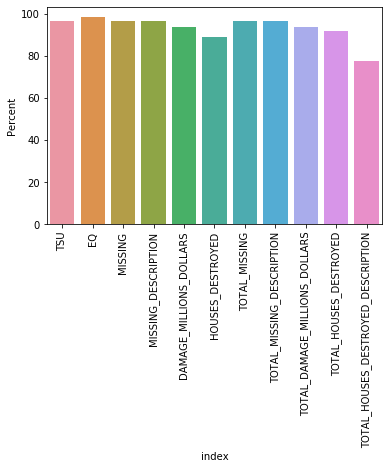

In [146]:
sns.barplot(x='index',y='Percent',data=vol_miss_perc[vol_miss_perc['Percent']>75])
plt.xticks(rotation=90)


The above columns have missing values above 75%

c. Fill the below variables with 0 (2 MARKS)
'DEATHS','MISSING','INJURIES','DAMAGE_MILLIONS_DOLLARS','HOUSES_DESTROYED','TOTAL_DEAT
HS','TOTAL_MISSING','TOTAL_INJURIES','TOTAL_DAMAGE_MILLIONS_DOLLARS','TOTAL_HOUSES_DESTROYED'

In [152]:
l1=['DEATHS','MISSING','INJURIES','DAMAGE_MILLIONS_DOLLARS','HOUSES_DESTROYED','TOTAL_DEATHS','TOTAL_MISSING','TOTAL_INJURIES','TOTAL_DAMAGE_MILLIONS_DOLLARS','TOTAL_HOUSES_DESTROYED']

In [153]:
l1

['DEATHS',
 'MISSING',
 'INJURIES',
 'DAMAGE_MILLIONS_DOLLARS',
 'HOUSES_DESTROYED',
 'TOTAL_DEATHS',
 'TOTAL_MISSING',
 'TOTAL_INJURIES',
 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
 'TOTAL_HOUSES_DESTROYED']

In [172]:
vol[l1].isnull().sum()

DEATHS                           34
MISSING                          61
INJURIES                         45
DAMAGE_MILLIONS_DOLLARS          59
HOUSES_DESTROYED                 56
TOTAL_DEATHS                     34
TOTAL_MISSING                    61
TOTAL_INJURIES                   45
TOTAL_DAMAGE_MILLIONS_DOLLARS    59
TOTAL_HOUSES_DESTROYED           58
dtype: int64

In [173]:
vol[l1]=vol[l1].fillna(0)

In [176]:
vol.isnull().sum()

Year                                   0
TSU                                   61
EQ                                    62
Name                                   0
Elevation                              0
Type                                   0
Status                                 0
Time                                   0
VEI                                   44
Agent                                 40
DEATHS                                 0
DEATHS_DESCRIPTION                    34
MISSING                                0
MISSING_DESCRIPTION                   61
INJURIES                               0
INJURIES_DESCRIPTION                  42
DAMAGE_MILLIONS_DOLLARS                0
DAMAGE_DESCRIPTION                    22
HOUSES_DESTROYED                       0
HOUSES_DESTROYED_DESCRIPTION          47
TOTAL_DEATHS                           0
TOTAL_DEATHS_DESCRIPTION              34
TOTAL_MISSING                          0
TOTAL_MISSING_DESCRIPTION             61
TOTAL_INJURIES  

In [174]:
vol[l1].isnull().sum()

DEATHS                           0
MISSING                          0
INJURIES                         0
DAMAGE_MILLIONS_DOLLARS          0
HOUSES_DESTROYED                 0
TOTAL_DEATHS                     0
TOTAL_MISSING                    0
TOTAL_INJURIES                   0
TOTAL_DAMAGE_MILLIONS_DOLLARS    0
TOTAL_HOUSES_DESTROYED           0
dtype: int64

d. After imputation, again check for the missing percentage of null values present in the dataset,
provide the inference (1 MARKS)


In [204]:
vol_miss2=vol.isna()
vol_sum2=vol_miss2.sum()
vol_miss_perc2=round(vol_sum2/len(vol)*100,2)
vol_miss_perc2=pd.DataFrame({'Percent':vol_miss_perc2})

vol_miss_perc2.reset_index(inplace=True)
vol_miss_perc2

<IPython.core.display.Javascript object>

,index,Percent
0,Year,0.00
1,TSU,96.83
2,EQ,98.41
3,Name,0.00
4,Elevation,0.00
5,Type,0.00
6,Status,0.00
7,Time,0.00
8,VEI,69.84
9,Agent,63.49


While We filled a few Variables with 0 There are still a lot of variables havving large amount of missing Values

e. Drop the columns which contain more than 50% of null values, name the new data frame as
data_new (2 MARKS)

In [202]:
x=vol_miss_perc2['index'][vol_miss_perc2['Percent']<50]
x

0                              Year
3                              Name
4                         Elevation
5                              Type
6                            Status
7                              Time
10                           DEATHS
12                          MISSING
14                         INJURIES
16          DAMAGE_MILLIONS_DOLLARS
17               DAMAGE_DESCRIPTION
18                 HOUSES_DESTROYED
20                     TOTAL_DEATHS
22                    TOTAL_MISSING
24                   TOTAL_INJURIES
26    TOTAL_DAMAGE_MILLIONS_DOLLARS
27         TOTAL_DAMAGE_DESCRIPTION
28           TOTAL_HOUSES_DESTROYED
30                         Latitude
31                        Longitude
32                          Country
Name: index, dtype: object

In [195]:
l2=[]

for i in x:
    l2.append(i)
    
l2

['Year',
 'Name',
 'Elevation',
 'Type',
 'Status',
 'Time',
 'DEATHS',
 'MISSING',
 'INJURIES',
 'DAMAGE_MILLIONS_DOLLARS',
 'DAMAGE_DESCRIPTION',
 'HOUSES_DESTROYED',
 'TOTAL_DEATHS',
 'TOTAL_MISSING',
 'TOTAL_INJURIES',
 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
 'TOTAL_DAMAGE_DESCRIPTION',
 'TOTAL_HOUSES_DESTROYED',
 'Latitude',
 'Longitude',
 'Country']

In [197]:
data_new=vol[l2]

In [199]:
data_new.isnull().sum()

Year                              0
Name                              0
Elevation                         0
Type                              0
Status                            0
Time                              0
DEATHS                            0
MISSING                           0
INJURIES                          0
DAMAGE_MILLIONS_DOLLARS           0
DAMAGE_DESCRIPTION               22
HOUSES_DESTROYED                  0
TOTAL_DEATHS                      0
TOTAL_MISSING                     0
TOTAL_INJURIES                    0
TOTAL_DAMAGE_MILLIONS_DOLLARS     0
TOTAL_DAMAGE_DESCRIPTION         24
TOTAL_HOUSES_DESTROYED            0
Latitude                          0
Longitude                         0
Country                           0
dtype: int64

We removed columns which had missing values more than 50%

# SECTION C

## SUB-SECTION 3

a. Compare the 'Country' and 'Status' variable and provide inferences about the volcanic eruptions. (2
MARKS)


In [206]:
data_new.columns

Index(['Year', 'Name', 'Elevation', 'Type', 'Status', 'Time', 'DEATHS',
       'MISSING', 'INJURIES', 'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_DESCRIPTION',
       'HOUSES_DESTROYED', 'TOTAL_DEATHS', 'TOTAL_MISSING', 'TOTAL_INJURIES',
       'TOTAL_DAMAGE_MILLIONS_DOLLARS', 'TOTAL_DAMAGE_DESCRIPTION',
       'TOTAL_HOUSES_DESTROYED', 'Latitude', 'Longitude', 'Country'],
      dtype='object')

In [213]:
data_new.Status.unique()

array(['Historical', 'Holocene', 'Tephrochronology'], dtype=object)

<IPython.core.display.Javascript object>

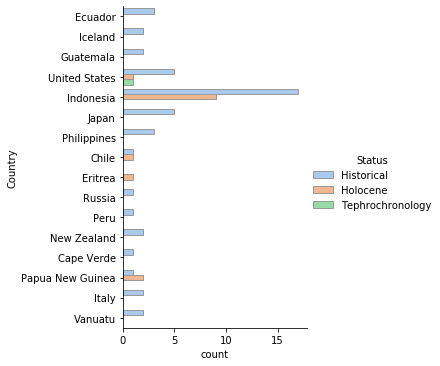

In [225]:
sns.catplot(y="Country", hue="Status", kind="count",
            palette="pastel", edgecolor=".6",
            data=data_new);

It can be seen That Tephorchronolgy is only in US. Holocene and Historical  are prominant in Indonesia

b. Display a barplot comparing the Type, country and total_injuries (5 MARKS)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

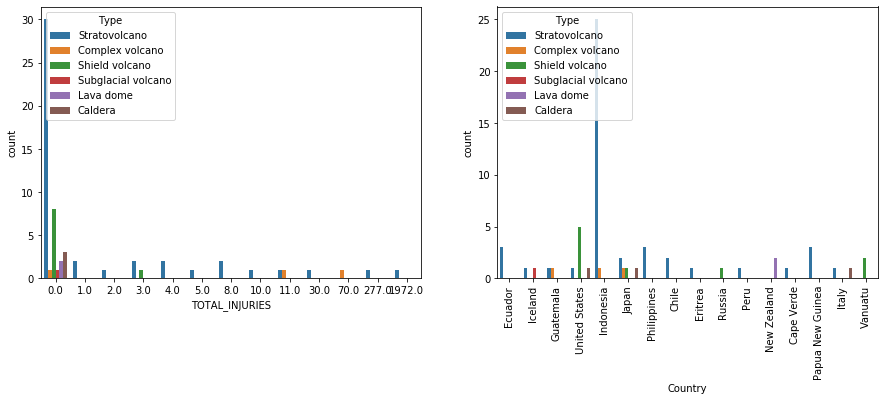

In [245]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x='TOTAL_INJURIES',hue='Type',data=data_new)
plt.subplot(122)
sns.countplot(x='Country',hue='Type',data=data_new)
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

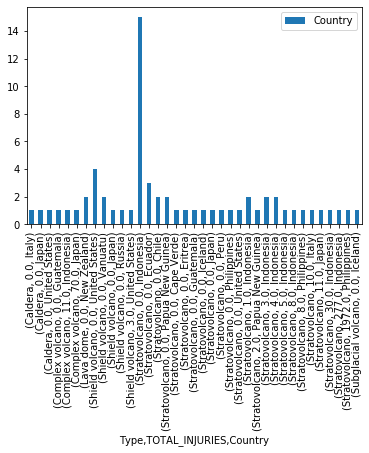

In [235]:
pd.DataFrame(data_new.groupby(["Type","TOTAL_INJURIES"])["Country"].value_counts()).plot(kind="bar")

c. Plot the Seasonality for the Total_Deaths, state your observations (5 MARKS)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

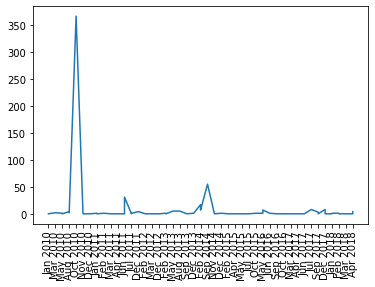

In [238]:
plt.plot(data_new['Year'],data_new['TOTAL_DEATHS'])
plt.xticks(rotation=90)
plt.show()

d. Display pairplot for only the numerical variables, state your observations with respective to
skewness (3 MARKS)

In [240]:
l3=[]
for i in data_new.columns:
    if data_new[i].dtype!='O':
        l3.append(i)
        
        

In [241]:
l3

['Elevation',
 'DEATHS',
 'MISSING',
 'INJURIES',
 'DAMAGE_MILLIONS_DOLLARS',
 'DAMAGE_DESCRIPTION',
 'HOUSES_DESTROYED',
 'TOTAL_DEATHS',
 'TOTAL_MISSING',
 'TOTAL_INJURIES',
 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
 'TOTAL_DAMAGE_DESCRIPTION',
 'TOTAL_HOUSES_DESTROYED',
 'Latitude',
 'Longitude']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

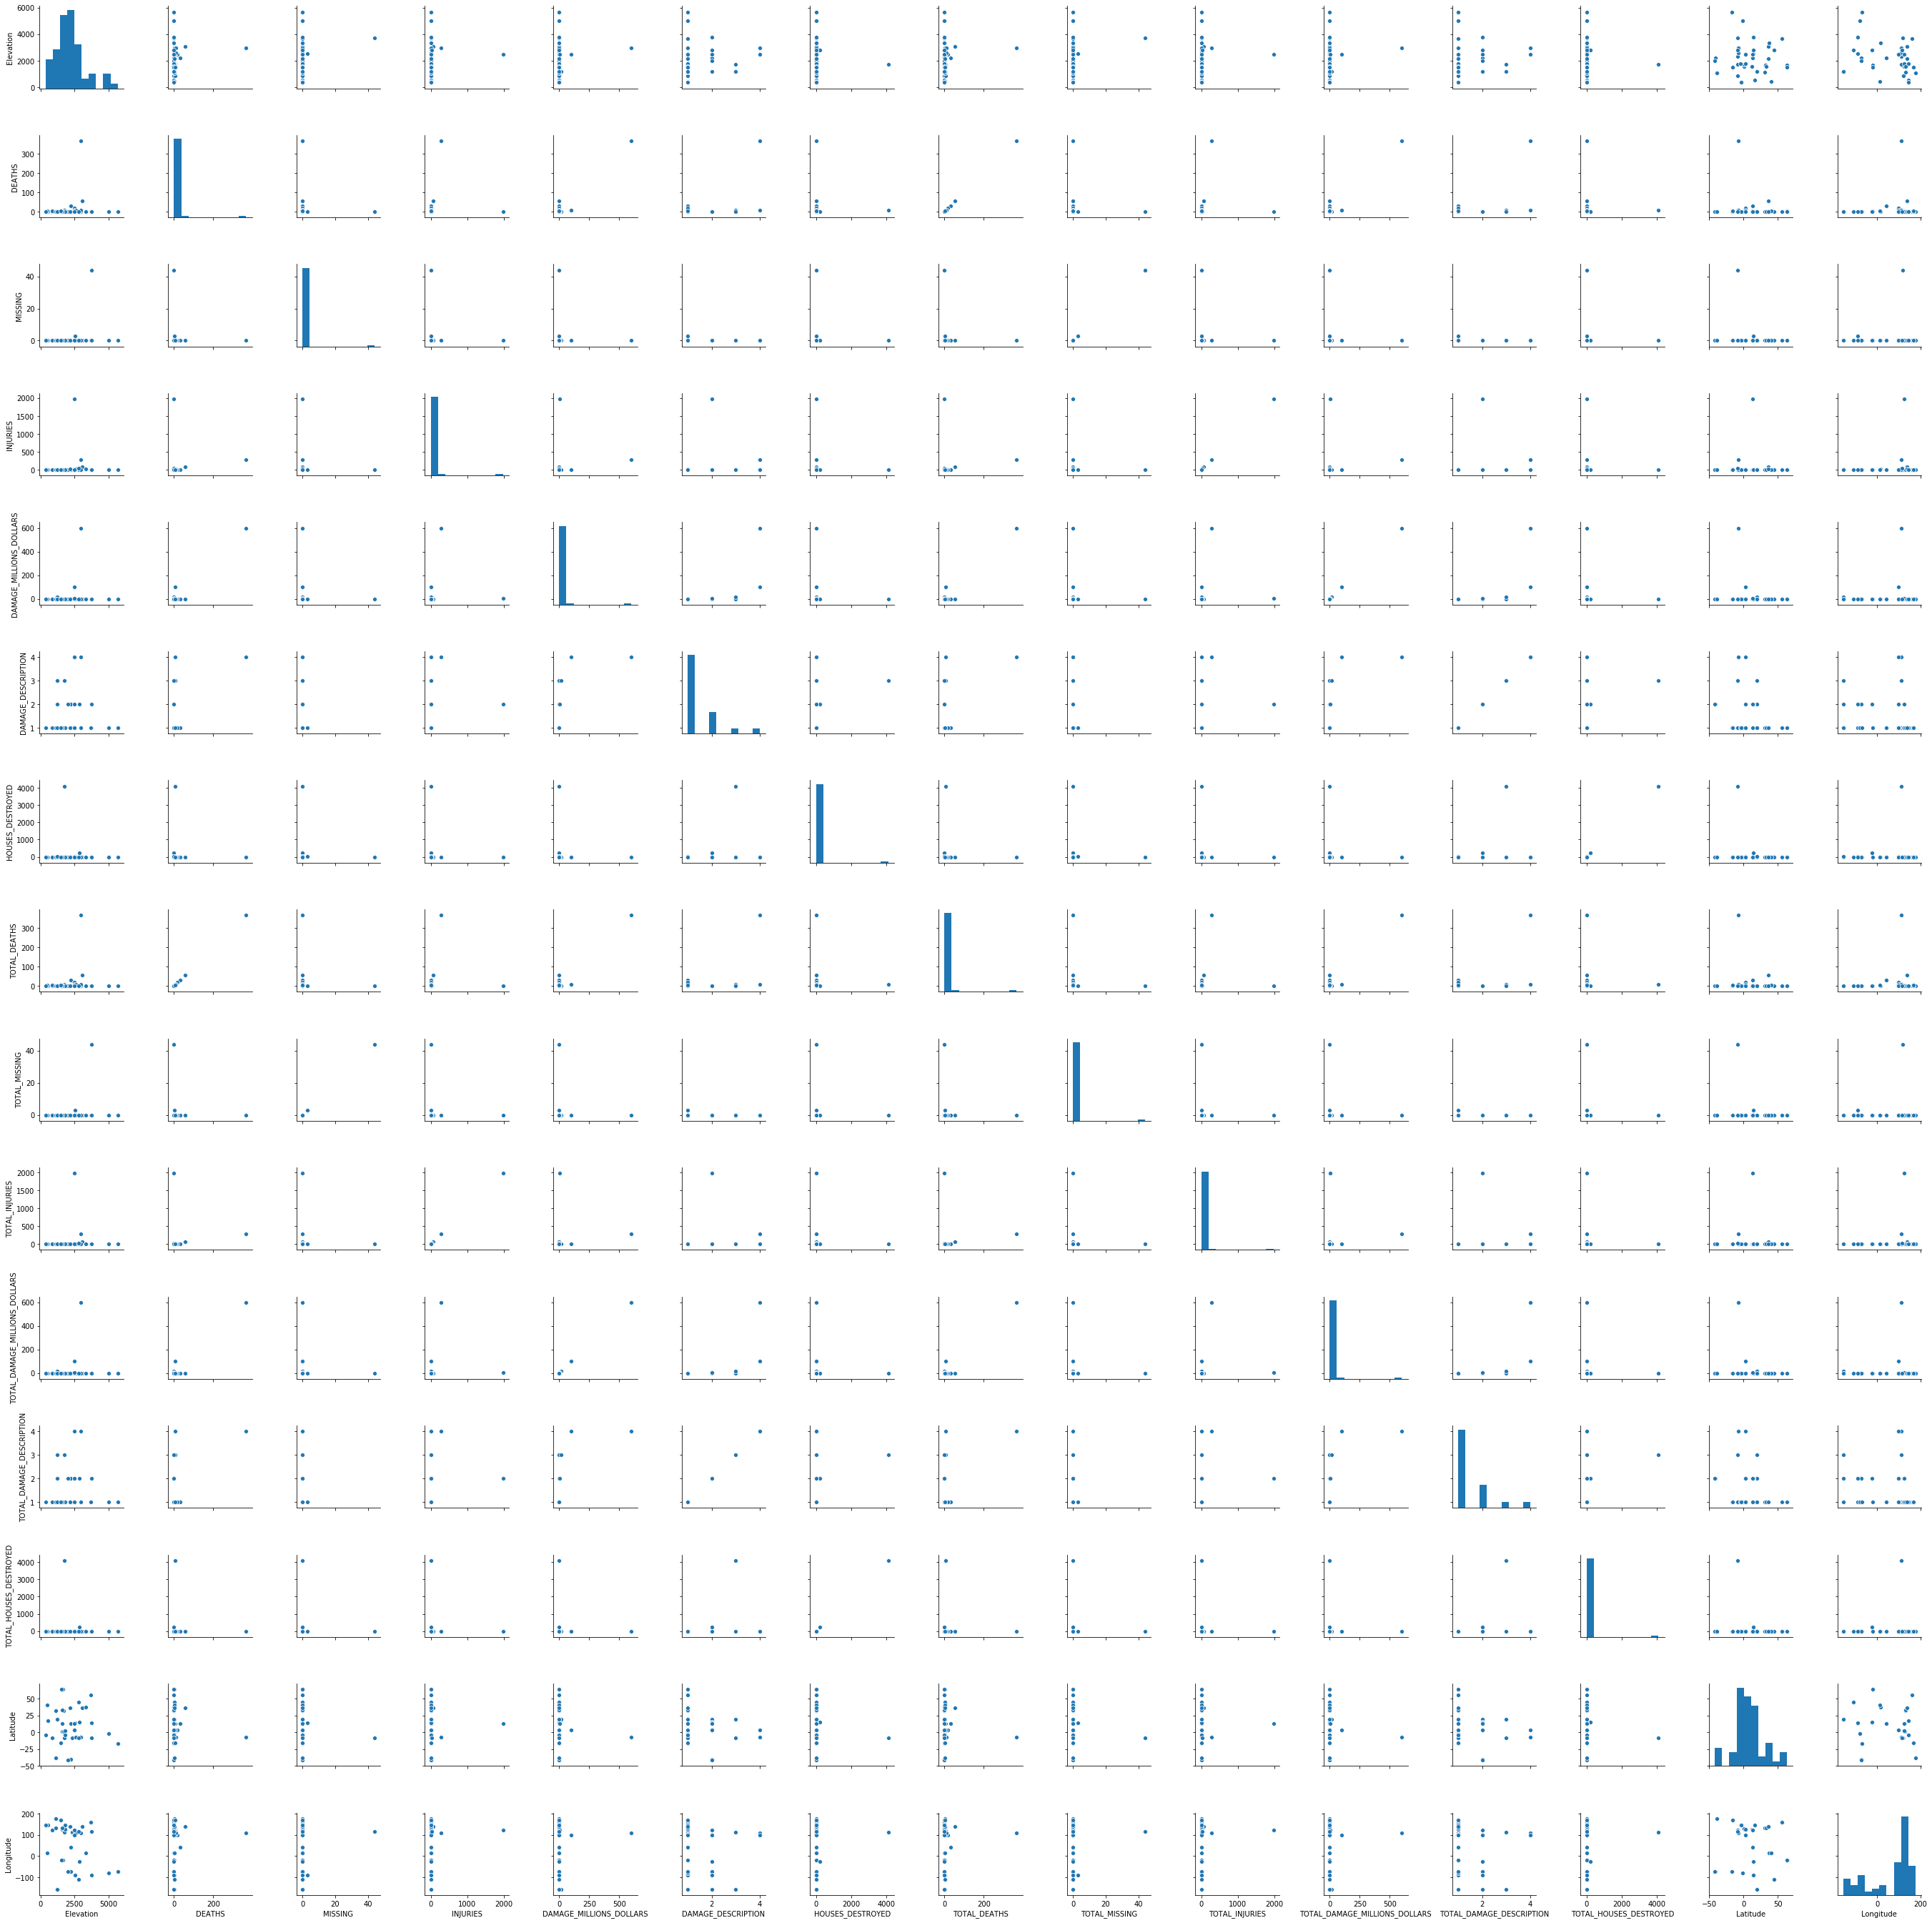

In [244]:
sns.pairplot(data_new[l3])
plt.show()